# Temperature-Analysis

Inspired by a visualization portrayed in "The Visual Display of Quantitative Information" by E. Tufte, I decided to make an analysis of temperature for the city of Mississauga, ON and hopefully get some insights related to global warming

In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data

Previously, I have collected temperature data from 2012 to 2019.
From the api we get daily measurements from the available stations.

- TMAX: Maximim daily temperature
- TMIN: Minimum daily temperature
- TAVG: Average daily temperature.

In [2]:
df = pd.read_csv('data/toronto_temperature.csv')
stations = pd.read_csv('data/weather_stations.csv')

In [3]:
df.head()

,date,datatype,station,attributes,value
0,2019-01-01T00:00:00,TMAX,GHCND:CA006152695,",,C,",2.5
1,2019-01-01T00:00:00,TAVG,GHCND:CA006155750,",,C,",1.3
2,2019-01-01T00:00:00,TMAX,GHCND:CA006155750,",,C,",1.5
3,2019-01-01T00:00:00,TMIN,GHCND:CA006155750,",,C,",1.0
4,2019-01-01T00:00:00,TAVG,GHCND:CA006155875,",,C,",-1.8


In [4]:
df.datatype.unique()

array(['TMAX', 'TAVG', 'TMIN'], dtype=object)

First I would like to know how many points we have in the dataset. We can do a summary per station per year.

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['year'] = df.date.apply(lambda x: x.year)

In [7]:
pivoted_df = df.pivot_table(index = df.year, columns=['station', 'datatype'], values = 'value', aggfunc='count', fill_value= 0)

In [8]:
pd.set_option('display.max_columns', None)
print(pivoted_df)

station  GHCND:CA006152695           GHCND:CA006155750            \
datatype              TAVG TMAX TMIN              TAVG TMAX TMIN   
year                                                               
2012                     0  213  213                 0  361  361   
2013                     0  188  188                 0  358  358   
2014                     0  187  187                 0  364  364   
2015                   260  310  303               271  360  360   
2016                   331  341  332               366  366  366   
2017                   342  349  344               359  359  360   
2018                   349  359  354               362  363  363   
2019                   348  356  350               364  364  364   

station  GHCND:CA006155875           GHCND:CA006155878            \
datatype              TAVG TMAX TMIN              TAVG TMAX TMIN   
year                                                               
2012                     0  341  341           

We can see that the station GHCND:CA006158355 has the most complete data

The dataset has data points from 13 weather stations.

In [9]:
len(df.station.unique())

13

In [10]:
available_stations = df.station.unique()
available_stations

array(['GHCND:CA006152695', 'GHCND:CA006155750', 'GHCND:CA006155875',
       'GHCND:CA006155878', 'GHCND:CA006158355', 'GHCND:CA006158731',
       'GHCND:CA006159123', 'GHCND:CA00615S001', 'GHCND:CA006158751',
       'GHCND:CA00615HMAK', 'GHCND:CA006157012', 'GHCND:CA006158667',
       'GHCND:CA006158733'], dtype=object)

In [42]:
stationsAvailable = stations.loc[stations['id'].isin(available_stations)]

We can plot the location of the weather stations, to get a feel of the data collected

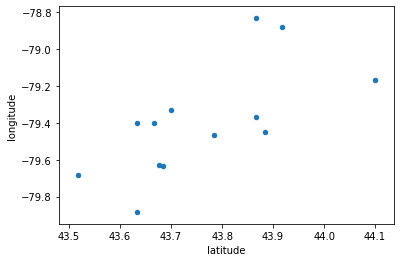

In [16]:
stations.loc[stations['id'].isin(available_stations)].plot(kind='scatter', x='latitude', y='longitude')

In [17]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [43]:
stationsAvailable['complete'] = 0


C:\Users\j_a_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
stationsAvailable.loc[stationsAvailable.id == 'GHCND:CA006158355','complete'] = 1

C:\Users\j_a_m\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
stationsAvailable.iat[115,5] =1

IndexError: index 115 is out of bounds for axis 0 with size 13

In [46]:
stationsAvailable

,id,name,latitude,longitude,elevation,complete
43,GHCND:CA006152695,"GEORGETOWN WWTP, CA",43.6333,-79.8833,221.0,0
78,GHCND:CA006155750,"OAKVILLE TWN, CA",43.5167,-79.6833,168.0,0
81,GHCND:CA006155875,"OSHAWA, CA",43.9167,-78.8833,140.0,0
84,GHCND:CA006155878,"OSHAWA WPCP, CA",43.8667,-78.8333,84.0,0
98,GHCND:CA006157012,"RICHMOND HILL, CA",43.8833,-79.4500,240.0,0
115,GHCND:CA006158355,"TORONTO CITY, CA",43.6667,-79.4000,113.0,1
154,GHCND:CA006158667,"TORONTO CITY CENTRE, CA",43.6333,-79.4000,77.0,0
160,GHCND:CA006158731,"TORONTO INTERNATIONAL A, CA",43.6767,-79.6306,173.4,0
162,GHCND:CA006158733,"TORONTO LESTER B. PEARSON INT, CA",43.6833,-79.6333,173.0,0
170,GHCND:CA006158751,"TORONTO EAST YORK DUSTAN, CA",43.7000,-79.3333,125.0,0


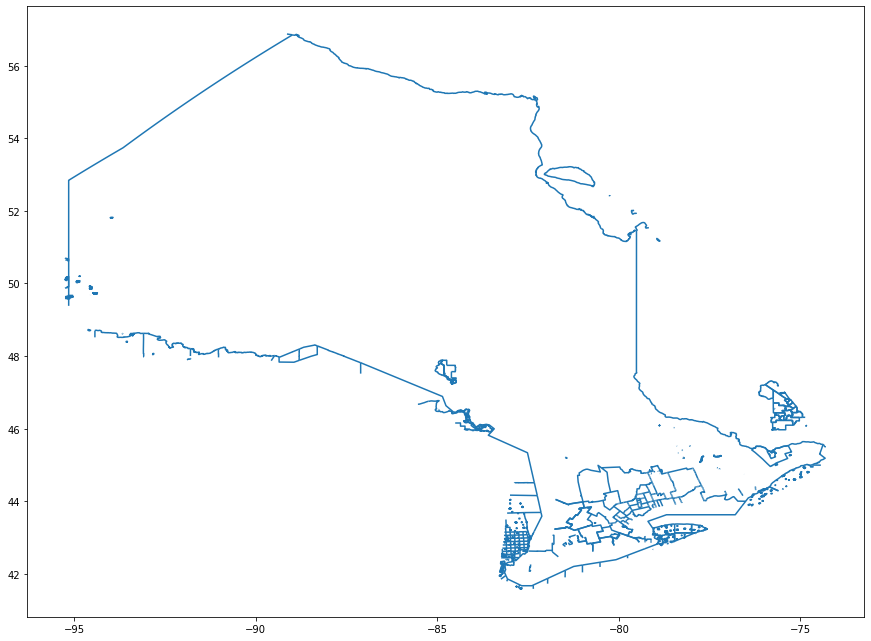

In [47]:
ontario_map = gpd.read_file('data/ontario/ontario_administrative.shp')
fig,ax = plt.subplots(figsize = (15,15))
ontario_map.plot(ax=ax)

In [48]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for  xy in zip( stationsAvailable['longitude'], stationsAvailable['latitude'])]
geo_df = gpd.GeoDataFrame(stationsAvailable, crs = crs, geometry = geometry)

(43, 44)

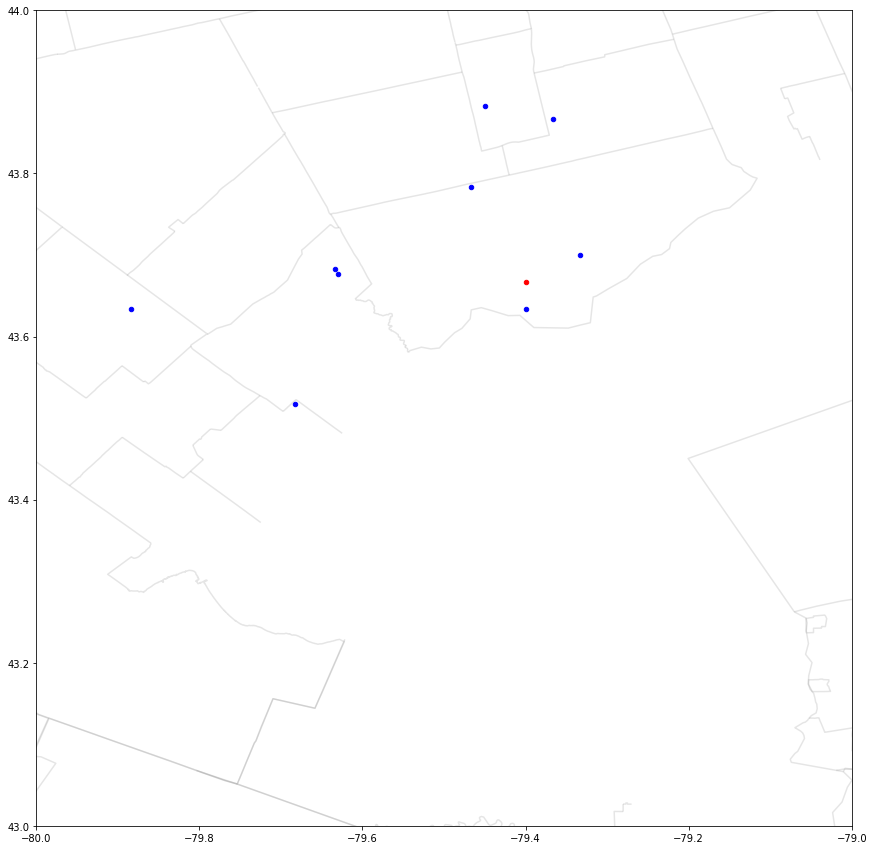

In [49]:
ig,ax = plt.subplots(figsize = (15,15))
ontario_map.plot(ax = ax, alpha = 0.2, color ="grey")
geo_df[geo_df['complete'] == 0].plot(ax = ax, markersize = 20, color = "blue", marker = "o",)
geo_df[geo_df['complete'] == 1].plot(ax = ax, markersize = 20, color = "red", marker = "o",)
plt.xlim(-80,-79)
plt.ylim(43,44)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

I will make a subset of the station GHCND:CA006158355 named Toronto, City

In [51]:
df_selected = df.loc[df['station']=='GHCND:CA006158355']

In [52]:
df_selected_pivoted = df_selected.pivot(index='date', columns='datatype', values='value')

We can define a plot function containing:
- Daily Max temperature
- Daily Min Temperature
- Rolling 5 day average of Max Temperature
- Rolling 5 day average of min Temperature

In [64]:
def plot_temperature(df):
    fig, ax = plt.subplots(figsize=(20,10))
#     ax = df['TMAX'].plot(ax=ax)
#     ax = df['TMIN'].plot(ax=ax)
    ax.fill_between(df.index, df['TMIN'].values, df['TMAX'].values, color='lightblue')
    ax =  df['TMAX'].rolling('5D').mean().plot(ax=ax, style='r--')
    ax =  df['TMIN'].rolling('5D').mean().plot(ax=ax, style='b--')
    plt.show()

### 2015 Temperature Summary

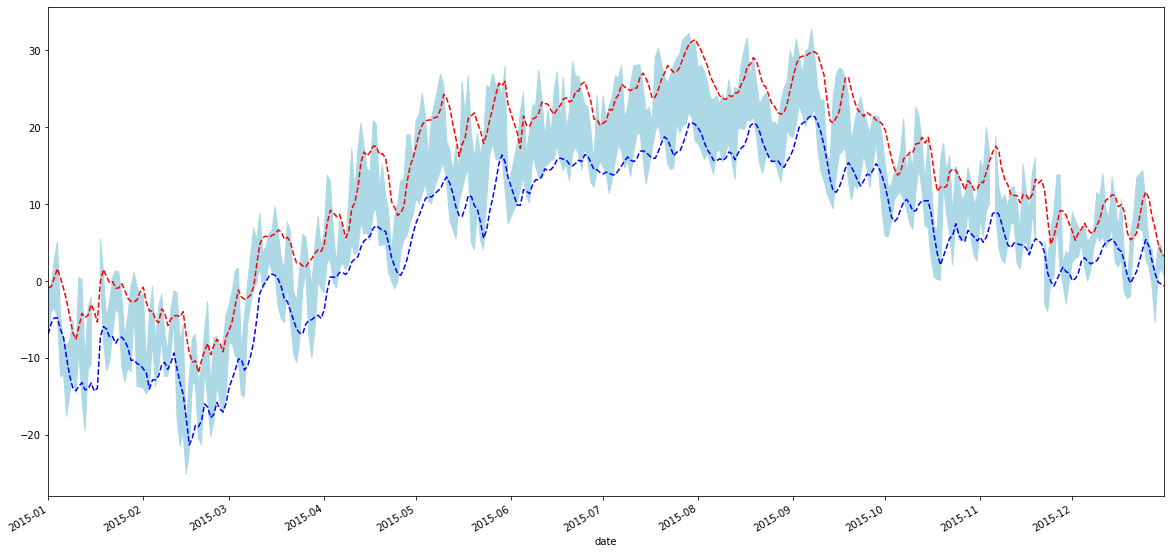

In [65]:
plot_temperature(df_selected_pivoted['2015'])

### 2016 Temperature Summary

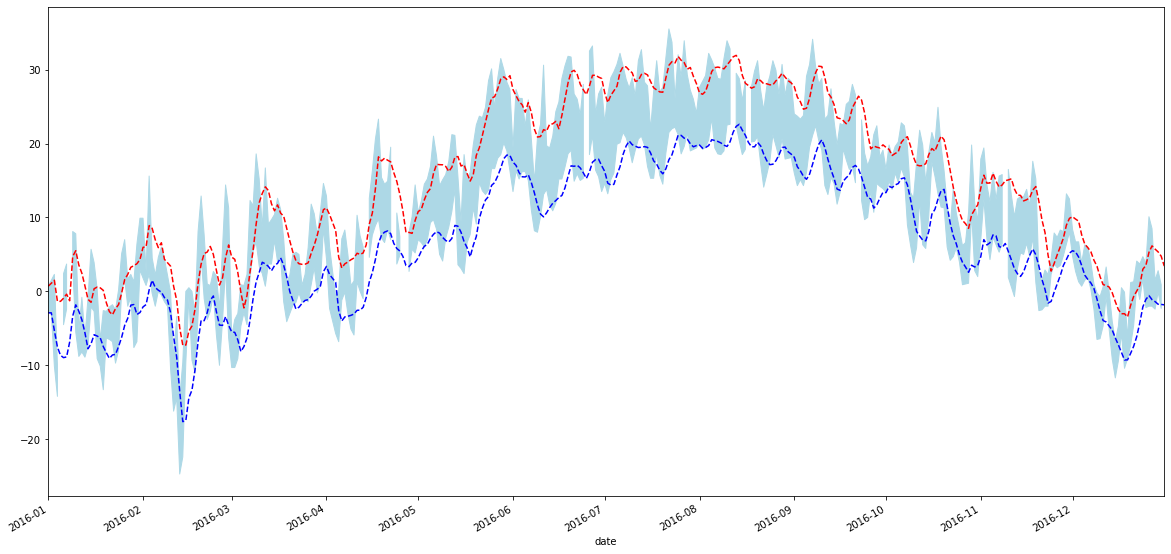

In [66]:
plot_temperature(df_selected_pivoted['2016'])

### 2017 Temperature Summary

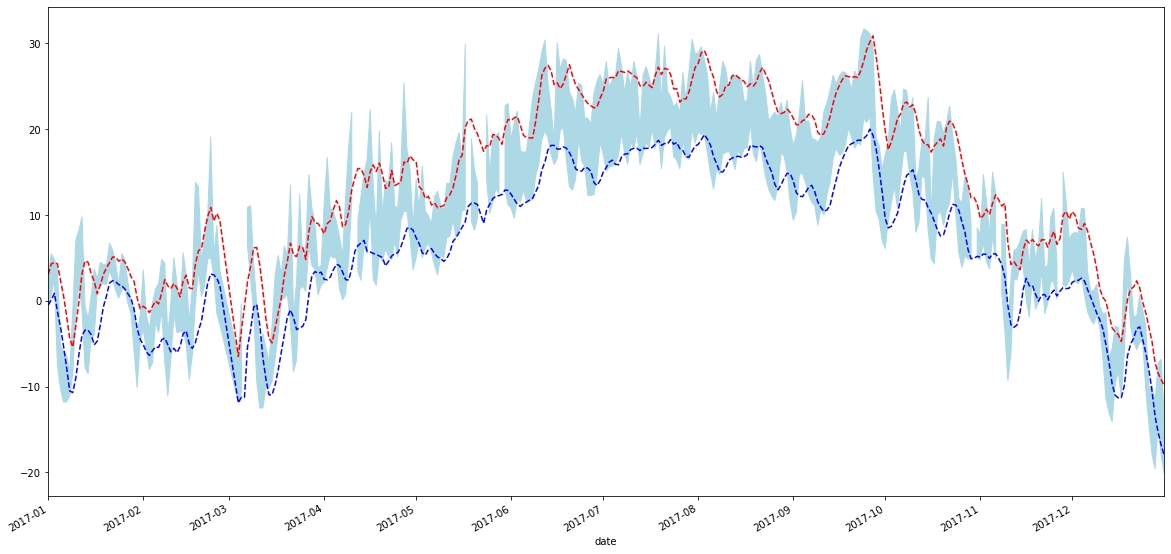

In [67]:
plot_temperature(df_selected_pivoted['2017'])

### 2018 Temperature Summary

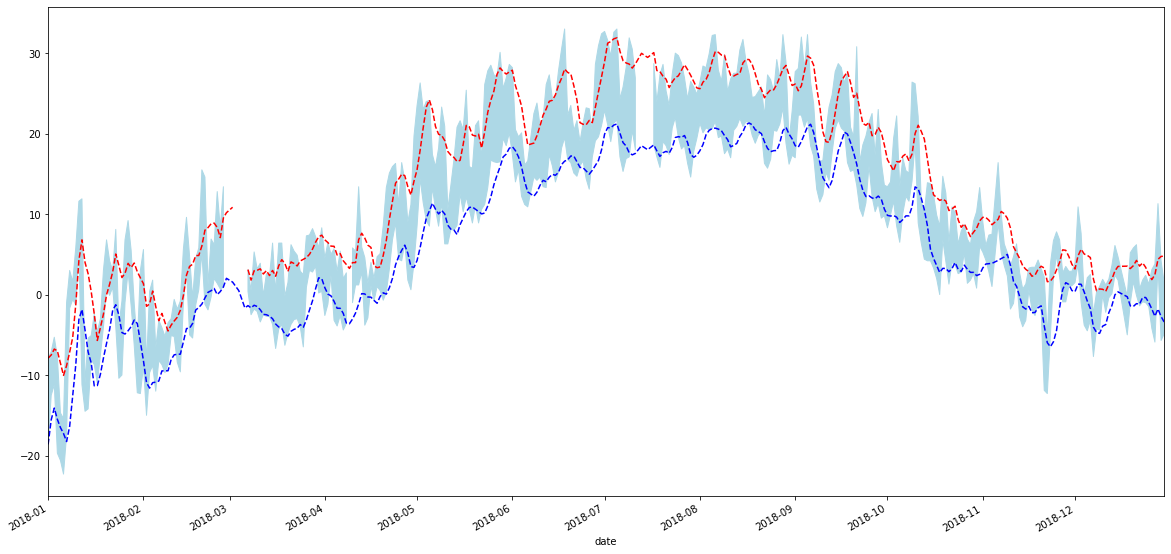

In [73]:
plot_temperature(df_selected_pivoted['2018'])

### 2019 Temperature Summary

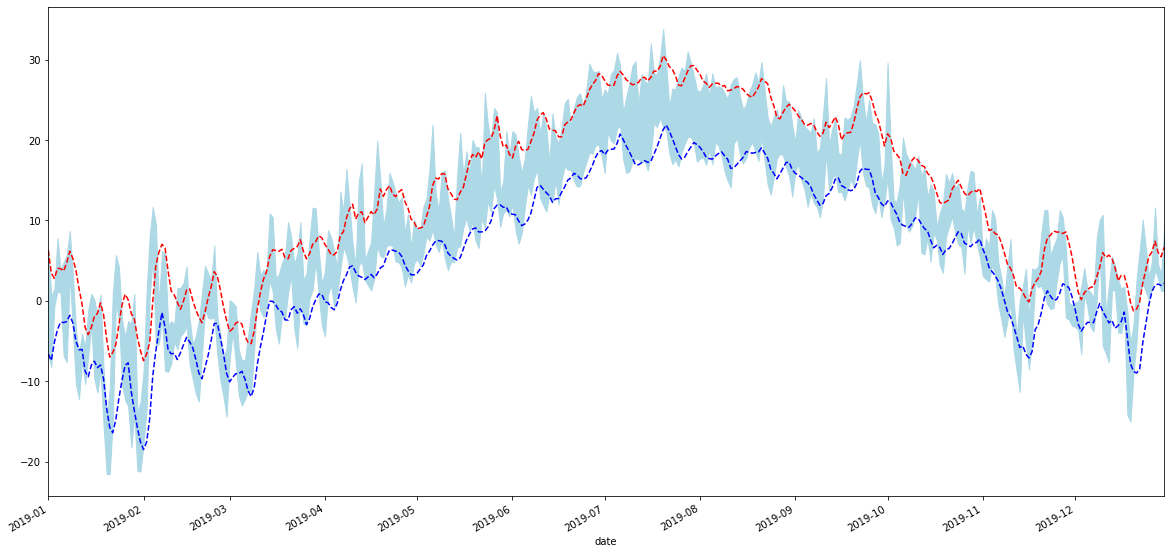

In [74]:
plot_temperature(df_selected_pivoted['2019'])

### Temperature Summary 2012 - 2019

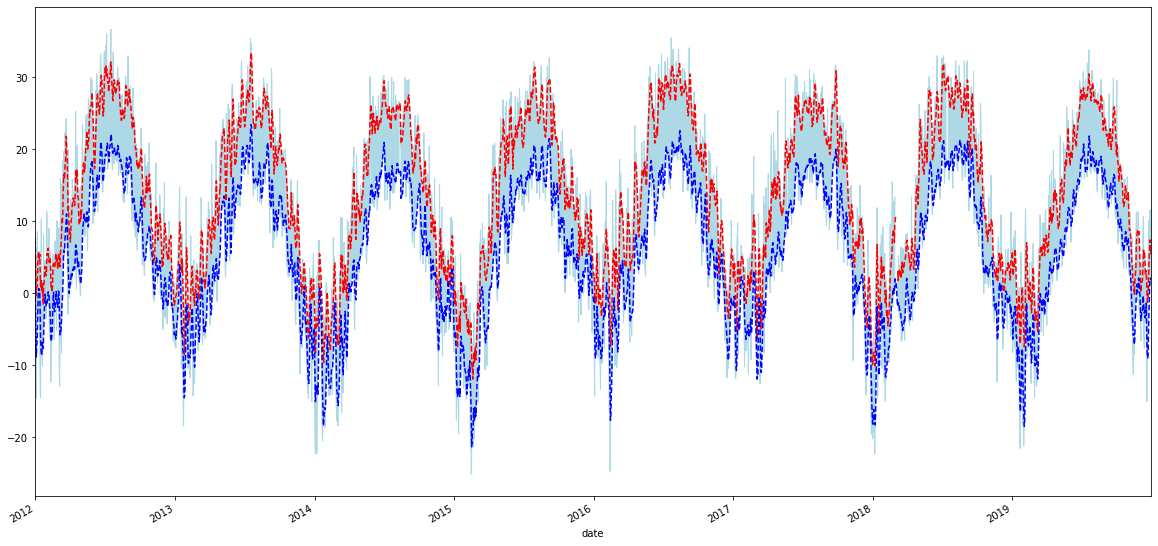

In [68]:
plot_temperature(df_selected_pivoted)

To smooth the plots a little bit more, I will create another plot function with a running average of 60 days.

In [71]:
def plot_temperature_avg(df):
    fig, ax = plt.subplots(figsize=(20,10))
    ax =  df['TMAX'].rolling('60D').mean().plot(ax=ax, style='r--')
    ax =  df['TMIN'].rolling('60D').mean().plot(ax=ax, style='b--')
    plt.show()

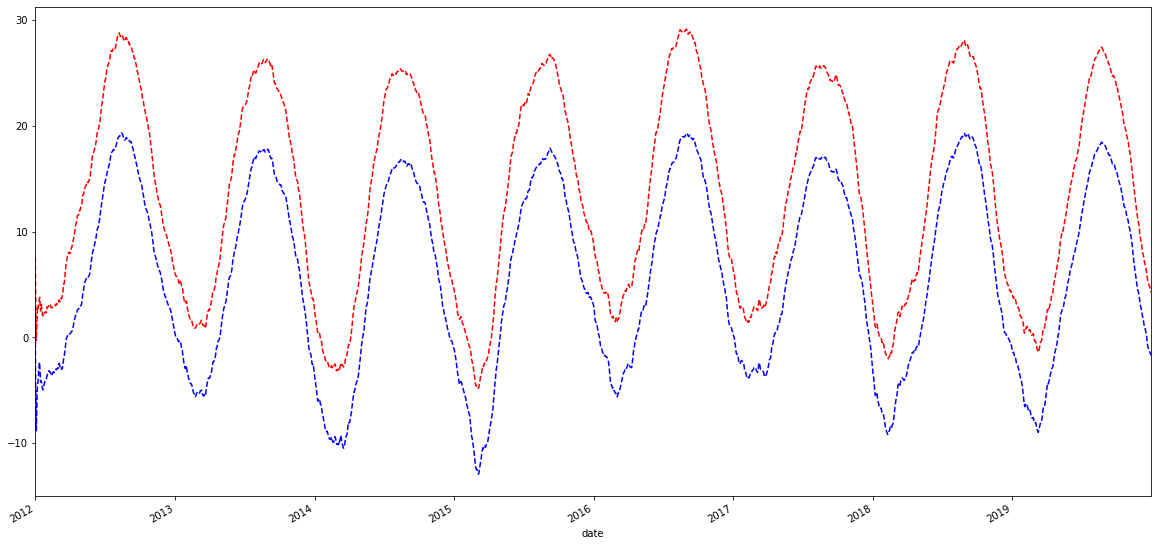

In [72]:
plot_temperature_avg(df_selected_pivoted)

It is important to continue a time series analysis to determine more appropiate insights of this dataset.